<a href="https://colab.research.google.com/github/TerriDonut/Yandex-educational-projects/blob/main/rental_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Введение:</b>
    
В ислледовании изучается рынок российского кинопроката, с целью выявить текущие тренды. Уделяется внимание фильмам, которые получили государственную поддержку.
Работать предстоит с данными, опубликованными на портале открытых данных Министерства культуры.

Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

<b>План исследования:</b>

- Выяснить:
-- Сколько фильмов выходило в прокат каждый год.
-- Какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах, как эта доля менялась по годам.
-- Как менялась динамика проката по годам.
-- Влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате
- Изучить фильмы с гос.поддержкой на предмет окупаемости и рейтинга
- Найти параметры кассово-успешных картин


##Шаг 1. Открытие файлов с данными и изучение общей информации
---



In [ ]:
#Импорт необходимых бибилиотек
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns

In [ ]:
#Вызов общей информации по данным
try:
    df_movies = pd.read_csv('/content/mkrf_movies.csv')
    df_shows = pd.read_csv('/content/mkrf_shows.csv')
except:
    df_movies = pd.read_csv('/datasets/mkrf_movies.csv')
    df_shows = pd.read_csv('/datasets/mkrf_shows.csv')

print(df_movies.info())
print(df_shows.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [ ]:
display(df_movies.head())
display(df_shows.head())
(df_movies['puNumber'].head(15))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


0     221048915
1     111013716
2     221038416
3     221026916
4     221030815
5     111013816
6     111007013
7     221074614
8     121011416
9     111019114
10    221031416
11    111019014
12    221011415
13    121003106
14    221008812
Name: puNumber, dtype: object

<b>Слияние:</b>

Объединяю данные реестра с прокатными. В первом датафрейме столбец с прокатными удостоверениями имеет тип object и значения мешающие его изменению, поэтому перед слиянием удалю аномалии

In [ ]:
#Удалил проценты
df_movies['puNumber'] = df_movies['puNumber'].str.replace('%', '')
#Превращю значения столбца в числовой тип, с сведением аномалий к 'NaN'
df_movies['puNumber'] = pd.to_numeric(df_movies['puNumber'], errors='coerce')
#Замею "NaN" на нули
df_movies['puNumber'] = df_movies['puNumber'].fillna(0)
#Преобразую тип данных
df_movies['puNumber'] = df_movies['puNumber'].astype('Int64')

In [ ]:
#Объединение двух датасетов и общая информация по данным
data = df_movies.merge(df_shows, how='outer', on='puNumber')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   Int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [ ]:
#Визуальная оценка
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [ ]:
#Проверка на пропуски в значениях
print(data['puNumber'].isnull().value_counts())
print(data['box_office'].isnull().value_counts())

False    7486
Name: puNumber, dtype: int64
True     4328
False    3158
Name: box_office, dtype: int64


<b>Вывод:</b>
    
Слияние прошло успешно, количество заполненных строк кассовых значений соответствует количеству строк из предыдущего датафрейма

##Шаг 2. Предобработка данных

In [ ]:
#Переименование для приведения к "змеиному" регистру
data.rename(columns={'puNumber': 'pu_number'}, inplace=True)

<b>Работа типами данных:</b>

Имеющиеся типы данных не везда подходят к данным в солбцах, например:
- Рейтинг перевожу в числовой формат
- Дату старта проката следует перевести в формат даты/времни
</div>

In [ ]:
#Вывод уникальных значений столбца "рейтинг"
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [ ]:
#Удаление процентов
data['ratings'] = data['ratings'].str.replace('%', '')
#Измененеие типа столбца
data['ratings'] = data['ratings'].astype(np.float64)
#Приведение к значениям до 10
data['ratings'] = data['ratings'].apply(lambda x: x / 10 if x > 10 else x)
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [ ]:
#Перевожу столбец в формат дыты\времени
data['show_start_date'] = pd.to_datetime(data['show_start_date'])
data['show_start_date'].head()

0   2015-11-27 12:00:00+00:00
1   2016-09-13 12:00:00+00:00
2   2016-10-10 12:00:00+00:00
3   2016-06-10 12:00:00+00:00
4   2015-07-29 12:00:00+00:00
Name: show_start_date, dtype: datetime64[ns, UTC]

In [ ]:
#Проверка
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   Int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

<b>Работа с пропусками:</b>

In [ ]:
#Подсчёт количества пропусков в столбцах
print(data.isna().mean()*100)

title                     0.000000
pu_number                 0.000000
show_start_date           0.000000
type                      0.000000
film_studio               0.240449
production_country        0.026717
director                  0.120224
producer                  7.587497
age_restriction           0.000000
refundable_support       95.565055
nonrefundable_support    95.565055
budget                   95.565055
financing_source         95.565055
ratings                  12.917446
genres                   13.037670
box_office               57.814587
dtype: float64


- Пропуски в "студии-производитель" меняю на "Неизвестно"
- "страна-производитель" так-же становится "Неизвестной"
- "режиссёр" и "продюсер", пропуски в данном столбце достоверно нет возвожности заполнить, будут "Неизвестно"
- В колонках связанных с гос.поддержкой около 95% пропусков, приведу к нулю, ведь отсутсвие в них данных, равно гос.поддержке этой картины
- Столбец "рейтинга" можно заполнить медианой, но на основе этого столбца будут проводиться исследования, поэтому поставлю нулевые значения, а потом отфильтрую. Можно предположить что это исконно нулеввые значения, но маловероятно что-бы 12% фильмов имелю столь низкую оценку
- "жанры" достоверно нет возможности заполнить
- Пропуски в кассовых сборах взяты из датафрейма кинотеатров, количество значений которого изначально не было сопостовимо со значениями из реестра, поэтому пропуски неизбежны, а заполнение медианой или средним знач. нецелесообразно, 57% крайне сильно могут исказить анализ

In [ ]:
#Переименование или обнуление пропусков
replacement_values = {
    'film_studio': 'Неизвестно',
    'production_country': 'Неизвестно',
    'director': 'Неизвестно',
    'producer': 'Неизвестно',
    'genres': 'Неизвестно',
    'financing_source': 'Неизвестно',
    'refundable_support': 0,
    'nonrefundable_support': 0,
    'ratings': 0,
    'budget': 0
}

data = data.fillna(replacement_values)
data.isna().mean()*100

title                     0.000000
pu_number                 0.000000
show_start_date           0.000000
type                      0.000000
film_studio               0.000000
production_country        0.000000
director                  0.000000
producer                  0.000000
age_restriction           0.000000
refundable_support        0.000000
nonrefundable_support     0.000000
budget                    0.000000
financing_source          0.000000
ratings                   0.000000
genres                    0.000000
box_office               57.814587
dtype: float64

<b>Поиск дубликатов:</b>

In [ ]:
#Вывод количества дубликатов
print(data.apply(lambda col: col.duplicated().sum()))
print(data.duplicated().sum())

title                     714
pu_number                   2
show_start_date          5521
type                     7478
film_studio              1995
production_country       6535
director                 2674
producer                 2136
age_restriction          7481
refundable_support       7452
nonrefundable_support    7411
budget                   7196
financing_source         7482
ratings                  7401
genres                   6743
box_office               4547
dtype: int64
0


- Названия фильмов могут совпадать, это нормально, плюс полностью одинаковых строк в датафрейме нет
- Прокатных удостоверения может быть несколько, но не одинаковых в реестре, удалю этот дубликат
- Дата\студия\страна\режиссёр\продюсер\возрастное ограничение вполне могут совпадать, дней всего 365, страны, студии и режиссёры с продюсерами снимают не один фильм за время существования
- Значения в столбцах гос.поддержки тоже вполне могут совпадать
- Рейтинг ограничен в значениях, совпадения неизбежны, аналогично с жанрами
- Кассовые сборы зачатсую могут совпадать, особенно учитываю тенденцию округлять значения

In [ ]:
#Удалю дубликат
data = data.drop_duplicates(subset='pu_number')

In [ ]:
#Поиск дубликатов по колонкам
duplicates = data.duplicated(subset=['title', 'pu_number'])
duplicates.value_counts()

False    7484
dtype: int64

<b>Изучение столбцов, которые содержат категориальные значения:</b>

In [ ]:
#Вывод уникальных значений категориальных столбцов
print(data['type'].unique())
print(data['production_country'].unique())
print(data['film_studio'].unique())
print(data['age_restriction'].unique())
print(data['genres'].unique())

['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный']
['США' 'СССР' 'Франция' 'СССР, Венгрия' 'Германия-Великобритания'
 'Великобритания - Италия' 'Чехословакия' 'США - Франция - Турция'
 'Новая Зеландия' 'Канада - Франция - Испания' 'США-Германия'
 'США - Великобритания' 'Великобритания' 'США - Германия'
 'Франция - Мексика - США' 'Россия, Казахстан, США' 'СССР, Швеция'
 'СССР, Франция, Англия, Куба, ГДР' 'Германия'
 'Великобритания-США-Германия-КНР' 'СССР, ЧССР, Западный Берлин, ПНР'
 'СССР, Италия' 'Гонконг, КНР' 'США - Франция'
 'США - Япония - Франция - Великобритания'
 'Гонконг - Сингапур - Таиланд - Великобритания' 'США-Канада'
 'Франция - Италия - Великобритания - США' 'Франция - США'
 'Ирландия-Великобритания-Германия' 'Чехия' 'США-Австралия'
 'СССР, Финляндия' 'США-Франция-Великобритания-Австрия' 'США - Бельгия'
 'США - Ирландия - Великобритания' 'Великобритания - США'
 'Люксембург - Ни

В категориальных данных множетсво отступов:
" Художественный" и подобных, это явление весьма распространенно при ручном вводе данных.
Поэтому удалю все крайние и начальные пробелы в данных

In [ ]:
#Создаю цикл для перебора категориальных столбцов и полседующим удалением пробелов
for col in [
    'title', 'type', 'production_country',
    'film_studio', 'producer',
    'director', 'age_restriction', 'genres']:
    data[col] = data[col].str.strip()


In [ ]:
#Проверка
print(data['type'].unique())

['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' 'Музыкально-развлекательный']


<b>Вывод:</b>
    
- Во всех категориальных данных присутствуют проблемы с пробелами, они присутстваовали в виде отступов.
- В каждом столбце пробелов не хватает в качестве разделителя значений между запятыми во время перечисления жанров/стран и прочее
- В столбце стран, перечисление временами происходит через дефис, а не запятыми
- Общей проблемой является ручной ввод данных, приводящий к постоянным недочётам  

<b>Изучение столбцов содержащие количественные значения:</b>

Числа в е-формате неудобно читать, можно перевести значения из руб в млн руб. Для этого значения в колонках разделю на 1 000 000 используя цикл

In [ ]:
#Создам переменную, что-бы как ранее не обращаться к колонкам
category_to_round = ['budget', 'box_office', 'nonrefundable_support', 'refundable_support']

for col in category_to_round:
   data[col] = (data[col] / 1000000).round(3)

In [ ]:
data.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.484000e+03,7484.000000,7484.000000,7484.000000,7484.000000,3158.000000
mean,1.351556e+08,0.526323,2.172860,5.644076,5.649653,76.478690
std,3.836159e+07,5.781874,16.151052,47.534439,2.412212,240.353125
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.120250e+08,0.000000,0.000000,0.000000,5.400000,0.086000
50%,1.210154e+08,0.000000,0.000000,0.000000,6.400000,2.328000
75%,1.240033e+08,0.000000,0.000000,0.000000,7.200000,23.979500
max,2.310011e+08,180.000000,400.000000,2305.074000,9.900000,3073.569000


In [ ]:
#Проверка
print((data['pu_number'] == 0).value_counts())
print(data[data['pu_number'] == 0].index[0])

False    7483
True        1
Name: pu_number, dtype: Int64
1797


<b>Вывод:</b>
    
- Столбец с номером в реестре не может иметь 0 значение, вероятно это ошибка, да и значение всего одно
- Нули являются заглушкой, в дальнейшем при необходимости отфильтрую их
- Известно что бюджет включает в себя гос.поддержку, отфильтрую данный столбец учитывая это

In [ ]:
#Создаю копию
temp = data.copy()
len(temp)

7484

In [ ]:
#Удалю строку с 0 номером в реестре
data = data.drop(1797)
len(data)

7483

In [ ]:
#Фильтр для актуального бюджета
data['good_budget'] = np.where(data['refundable_support'] + data['nonrefundable_support'] < data['budget'], data['budget'], np.nan)

<b>Добавление новых столбцов:</b>

In [ ]:
#Год премьеры
data['year_show'] = data['show_start_date'].dt.year

#Главный режиссёр
data['chief_director'] = data['director'].apply(lambda x: x.split(',')[0])

#Основной жанр
data['main_genre'] = data['genres'].apply(lambda x: x.split(',')[0])

In [ ]:
#Доля гос.поддержки
data['budget_support'] = np.where(data['good_budget']
                                  , ((data['refundable_support'] + data['nonrefundable_support']) / data['budget'])
                                  .round(2), np.nan)
data['budget_support'].value_counts()

0.65    26
0.66    24
0.70    22
0.67    18
0.62    18
        ..
0.78     1
0.07     1
0.18     1
0.10     1
0.08     1
Name: budget_support, Length: 62, dtype: int64

<b>Вывод по этапу предобработки:</b>
    
- В данных было множество пробелов, аномалий или ошибок, их устранил:
-- Поменял тип данных в нужных столбцах
-- Переименовал один их столбцов
-- Создал заглушки для пропусков
-- Удалил дубликаты
-- Устранил отступы в категориальных значениях
-- Добавил фильтры для корректности дальнейшего анализа
- Данные оптимизировал, в дальнейшем, по необходимости фильтруя заглушки будут получены чистые данные и значения

#Шаг 3. Проведение исследовательского анализ данных

<b>Изучение данных о ежегодном выходе фильмов:</b>

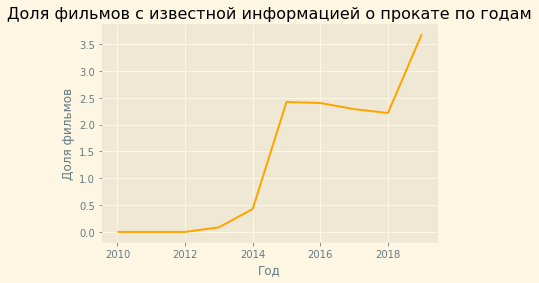

Ежегодное количество фильмов: year_show
2010     74
2011     87
2012    103
2013    154
2014    244
2015    458
2016    519
2017    357
2018    475
2019    530
Name: title, dtype: int64
Доля фильмов с известной информацией о прокате: year_show
2010    0.000000
2011    0.000000
2012    0.000000
2013    0.085117
2014    0.426353
2015    2.421749
2016    2.402611
2017    2.288094
2018    2.216493
2019    3.683797
Name: box_office, dtype: float64
Период с наибольшей долей фильмов с известной информацией о прокате: 2019


In [ ]:
#Создаю переменную-фильтр для вышедших в прокат фильмов
data_rental = data[data['box_office'] > 0]

#Нахожу общее число фильмов
total_films = len(data_rental)
#Группирую по годам
annual_rental = data_rental.groupby('year_show')['title'].count()
#Группирую фильмы о прокате которых известно
annual_cinema_release = data_rental.groupby('year_show')['box_office'].mean()

#Проходя по каждому году вычисляю долю фильмов с известной информацией о прокате
for year in annual_rental.index:
    #Нахожу сумму бюджета для каждого года
    budget_sum = data_rental[data_rental['year_show'] == year]['good_budget'].sum()
    #Вычисляю долю фильмов с известной информацией о прокате и добавляею в переменную
    annual_cinema_release[year] = budget_sum / total_films

plt.style.use('Solarize_Light2')
#Cтрою график изменения доли фильмов с известной информацией о прокате по годам
annual_cinema_release.plot(kind='line', color='orange')
plt.xlabel('Год')
plt.ylabel('Доля фильмов')
plt.title('Доля фильмов с известной информацией о прокате по годам', color='black')

plt.show()

#Нахожу год с максимальной долей фильмов и известной информацией о прокате
max_year = annual_cinema_release.idxmax()

#Вывод результатов
print('Ежегодное количество фильмов:', annual_rental)
print('Доля фильмов с известной информацией о прокате:', annual_cinema_release)
print('Период с наибольшей долей фильмов с известной информацией о прокате:', max_year)

<b>После проведённого анализа делаю следующие выводы:</b>

- Заметен ежегодный прирост в осведомленности о прокате фильмов
- До 2013 учёт совсем не велся
- С 2015 года информация практически о всех киноновинках в прокате фиксировалась
- в 2019 году наблюдается анамально большой скачок, доля информации о фильмах в прокате превысила количество вышедших фильмов, это можно связать с прокатом мировой "классики" в некоторых кинотеартах, так например, показывали в кинотеатрах анимационные произведения Хаяо Миядзаки, вышедшие далеко не в 2019 году, подобные явления и могли вызвать столь бурный рост

In [ ]:
#Создаю сводную таблицу, где индексом является год, а значениями - средняя и медианная сумма сборов
annual_fee = data.pivot_table(index='year_show', values='box_office', aggfunc=['mean', 'median'])

#Результаты
annual_fee

,mean,median
,box_office,box_office
year_show,,
2010,0.023152,0.0020
2011,0.129330,0.0030
2012,0.054289,0.0060
2013,0.161967,0.0040
2014,26.684401,0.0180
2015,84.940578,4.9210
2016,91.000567,3.8465
2017,136.032776,9.9680


<b>Вывод по исследованию среднего и медианы:</b>

- Медиана в значениях до 15 года неправдоподобно мала
--  Особенно выделяется 14 год со средним в 26млн и медианой в 180т.р. Это может быть вызвано выходом кассовых новинок, например фильмом по вселенной "трансформеров" и прочим.
- Значения медианы и среднего отличаются в десятки раз, что говорит о крайне малом количестве кассово больших фильмов
- Минимальная сумма сборов в 2010 и она равна 20к рублей, может в этот год только пробовали вводить мониторинг за кассовыми сборами кинотеатров, и тест проходил на социальной коротрометражке на которые иногда водили школьников в те годы  
- Далее наблюдается постепенный рост касоовых сборов кинотеатров, с пиком в 2017 году на сумму 136млн
- С 2018 начинается спад кассовых сборов, а в 19значения откатываются до времён 16года, причин может быть множество, от остутсвия интересных картин в кино, до большей популяризации и доступности онлайн-кинотеатров

In [ ]:
#Сокращаю строку возрастного рейтинга
data['age_restriction'] = data['age_restriction'].apply(lambda x: x.split('-')[0])

In [ ]:
#Создаю таблицу с данными о возрастной категории и сборах
age_rating = data.pivot_table(index='age_restriction', values='box_office', aggfunc='sum')

#Результаты
age_rating

,box_office
age_restriction,
«0+»,1204.998
«12+»,63225.587
«16+»,76583.666
«18+»,42974.723
«6+»,57530.728


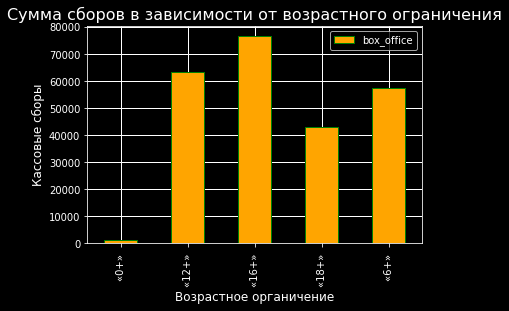

In [ ]:
plt.style.use('dark_background')
#Строю график изменения суммы сборов в зависимости от возрастного ограничения
age_rating.plot(kind='bar', color='orange', edgecolor='green');
plt.xlabel('Возрастное органичение')
plt.ylabel('Кассовые сборы')
plt.title('Сумма сборов в зависимости от возрастного ограничения')

plt.show()

<b>Вывод:</b>

- Саммые кассовые фильмы 16 и 12+, это объясняется их доступностью и низким порогом вхождения, условно человеку за 30+, чтобы расслабиться проще включить фильм 12или16+, ведь в нём не обещается чернуха и прочие прелести 18+, и в тоже время не будет слишком наивно и просто как 0-6+. Таким образом данные категрии приковывают не только аудиторию своего возраста, что и делает их самыми кассовыми
- Самые низкие сборы у фильмов 0+, потому-что они в основном расчитаны на аудиторию до 8-10 лет, а после этого порога уже не пользуются популярностью

In [ ]:
#Создаю столбец-фильтр
data['good_year'] = np.where(data['year_show'] >= 2015, data['year_show'], np.nan)

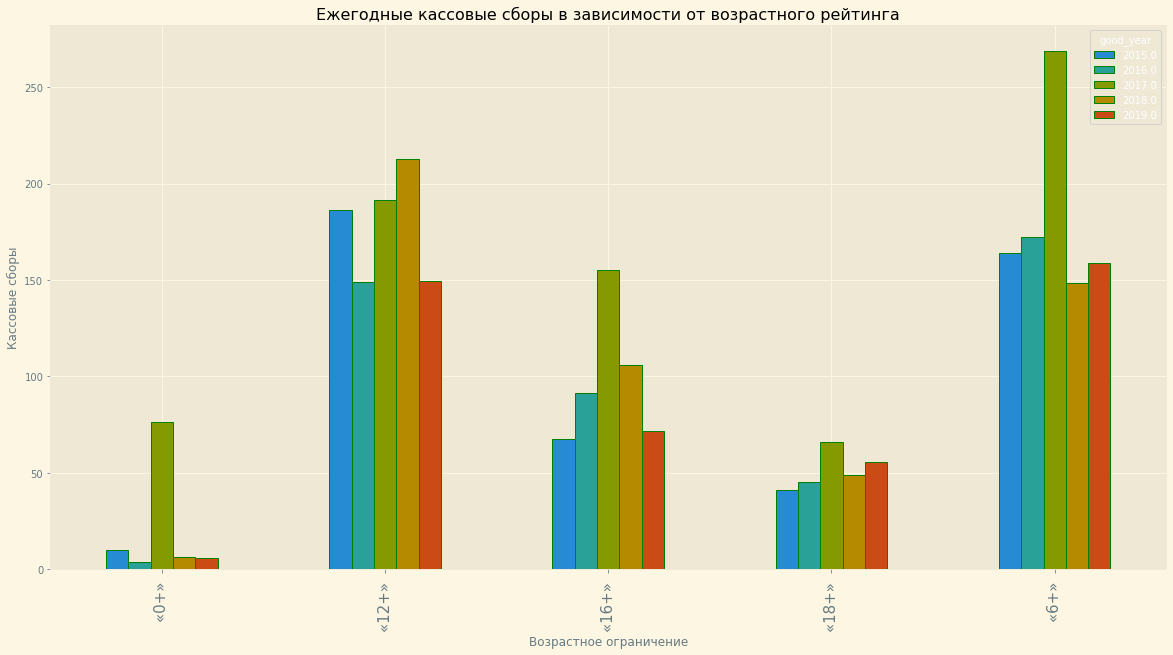

In [ ]:
plt.style.use('Solarize_Light2')
#Небольшая визуализация прибыли от категорий фильмов по годам
visual_age_rating = data.pivot_table(index='age_restriction', columns='good_year', values='box_office').plot.bar(figsize=(20, 10), edgecolor='green');

plt.xlabel('Возрастное ограничение')
plt.ylabel('Кассовые сборы')
plt.title('Ежегодные кассовые сборы в зависимости от возрастного рейтинга', color='black')
plt.xticks(fontsize=15)

plt.show()

In [ ]:
#Максимум сборов для возрастного ограничения
max_age_rating = data.pivot_table(index='age_restriction', columns='good_year', values='box_office', aggfunc=max)
max_age_rating

good_year,2015.0,2016.0,2017.0,2018.0,2019.0
age_restriction,,,,,
«0+»,158.025,64.734,206.478,24.177,13.780
«12+»,1658.861,1398.265,1655.038,2271.754,3073.569
«16+»,1486.131,1570.380,2118.396,1913.258,2576.614
«18+»,1006.737,1587.516,1036.725,1236.763,1890.368
«6+»,1646.581,2048.126,2779.686,1125.243,1911.945


In [ ]:
#Минимум сборов для возрастного ограничения
min_age_rating = data.pivot_table(index='age_restriction', columns='good_year', values='box_office', aggfunc=min)
min_age_rating

good_year,2015.0,2016.0,2017.0,2018.0,2019.0
age_restriction,,,,,
«0+»,0.000,0.000,0.942,0.108,0.081
«12+»,0.000,0.002,0.008,0.041,0.007
«16+»,0.000,0.000,0.161,0.083,0.035
«18+»,0.002,0.001,0.068,0.046,0.074
«6+»,0.000,0.000,0.263,0.235,0.004


<b>Вывод:</b>

- Интерес к фильмам 0+ нестабилен и колеблется от года к году, это может быть связано с выходом каких-либо знаковых фильмов в этой категории
- 12 и 16+ крайне тесно переплетены и периодитчески забирают лидерство друг у друга, с чем это может быть связано комментировал выше
- 6+ стабильно рос, но упал в последние 2 года выборки, опять же ссылаюсь на качество и количество фильмов в эти годы
- 18+ вполне стабильно существует посередине

In [ ]:
#Медианные и средние сборы возрастного рейтинга
age_rating = data.pivot_table(index='age_restriction', values='box_office', aggfunc=['mean', 'median'])

age_rating

,mean,median
,box_office,box_office
age_restriction,,
«0+»,4.858863,0.079
«12+»,115.586082,0.711
«16+»,70.067398,1.745
«18+»,48.834913,5.108
«6+»,147.514687,5.861


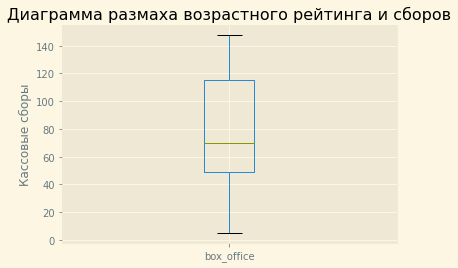

In [ ]:
#Визуализация
data.pivot_table(index='age_restriction', values='box_office').boxplot();

plt.ylabel('Кассовые сборы')
plt.title('Диаграмма размаха возрастного рейтинга и сборов', color='black')

plt.show()

<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Вывод по исследованию среднего и медианы:</b>

- Результаты в целом сопоставимы с предыдущими исследованими
-- 6+ лидирует как по среднему, так и по значению медианы
-- 0+ самые низкие значения
- Нет аномальных выбросов на диаграмме размаха, норма находится в пределах среднего самой суммарно кассовой категории (16+)

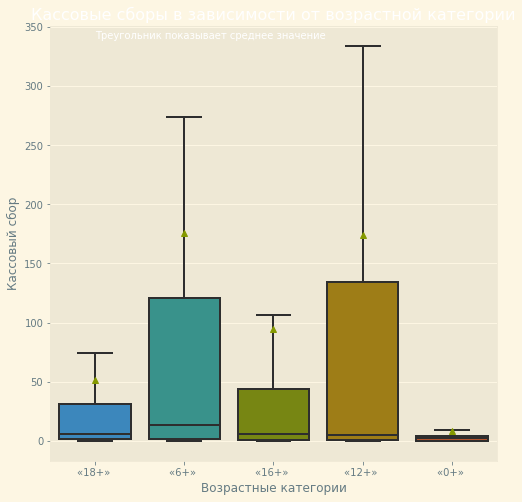

In [ ]:
temp = data.copy()
#Для удобства укорощаю названия категорий
def get_first_value(s, sep = ','):  #Функция для выбора первого элемента из перечисления
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))
#Сохраняю маску для среза по годам
year_mask = temp['good_year'] >= 2015

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории',
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 340,'Треугольник показывает среднее значение')
plt.show()

<b>Вывод по исследовательскому анализу данных:</b>

- Изучена осведомленность о выходе фильмов в прокат, осведомленность об этом увеличивается с каждым годом наблюдений
- Фильмы различных возрастных категорий приносят разные доходы, так например 0+ является самой не прибыльной категорией кино, в то-же время 16/12+ являются лидерами по доходам, но по средним значениям их превосходит 6+.

#Шаг 4. Исследование фильмов, которые получили государственную поддержку

Проверю окупаемость и рейтинг фильмов с гос.поддержкой


In [ ]:
#Создаю переменную-фильтр, которая не будет учитывать пропуски или нули
filtered_finance = data[(data['good_budget'] > 0) & (data['box_office'].notna())
                      & (data['box_office'] > 0) & (data['ratings'] > 1.5)]

#Добавляю солбец с булевым значением "успеха" или "провала" картины
data['successful_films'] = filtered_finance['box_office'] > filtered_finance['good_budget']

#Создаю переменную с количеством True/False
counts_successful_films = data['successful_films'].value_counts()

#Нахожу долю успешных картин с гос.поддержкой
success_ratio = (counts_successful_films[True] / (counts_successful_films[True] + counts_successful_films[False])).round(2)

#Результаты
print('Количество фильмов с гос.поддержкой:', data['successful_films'].count())
print('Успешность в прокате:', counts_successful_films)
print('Доля успешных фильмов с гос.поддержкой: {}%'.format(success_ratio * 100))

Количество фильмов с гос.поддержкой: 286
Успешность в прокате: False    221
True      65
Name: successful_films, dtype: int64
Доля успешных фильмов с гос.поддержкой: 23.0%


In [ ]:
#Создаю переменную с суммой гос.поддержки
total_support = (data['refundable_support'] + data['nonrefundable_support']).sum()
#Создаю переменную для поиска процента возвратных средств
refundable_percentage = (data['refundable_support'].sum() / total_support).round(2)

print('Процент средств возвращаемых государству: {}%'.format(refundable_percentage * 100))

Процент средств возвращаемых государству: 19.0%


box_office
333.597     2305.074
511.776     1032.906
717.703      980.000
54.243       779.942
364.285      684.201
1402.255     635.284
2779.686     590.192
2271.754     563.785
544.332      528.442
590.405      500.013
Name: budget, dtype: float64


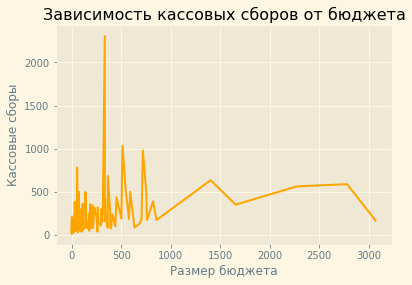

In [ ]:
#Оценю как высокий бюджет влияет на успех картины в прокате
budget_to_box_office = filtered_finance.groupby('box_office')['budget'].mean()

#Выведу 10 наибольших значений бюджета
print(budget_to_box_office.nlargest(10))

#Визуализация
plt.plot(budget_to_box_office.index, budget_to_box_office.values, 'orange')
plt.xlabel('Размер бюджета')
plt.ylabel('Кассовые сборы')
plt.title('Зависимость кассовых сборов от бюджета', color='black')
plt.show()

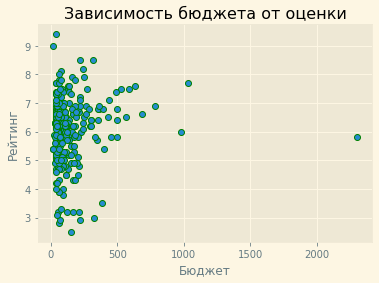

In [ ]:
#Построение графика зависимости бюджета и оценки
plt.scatter(filtered_finance['good_budget'], filtered_finance['ratings'], edgecolor='green')

plt.xlabel('Бюджет')
plt.ylabel('Рейтинг')
plt.title('Зависимость бюджета от оценки', color='black')

plt.show()

successful_films  False  True 
main_genre                    
биография          6.60   7.50
боевик             6.10   7.30
военный            6.50   6.40
детектив           6.80    NaN
детский            7.30    NaN
драма              6.40   6.80
история            5.80   6.40
комедия            5.55   5.85
криминал           7.80    NaN
мелодрама          6.20    NaN
мультфильм         6.10   6.50
мюзикл             6.60    NaN
приключения        5.20   7.50
реальное ТВ        5.60    NaN
семейный           4.80   5.00
спорт              6.30   7.25
триллер            5.50   7.00
ужасы              5.10   5.10
фантастика         6.95   4.90
фэнтези            6.95   4.60


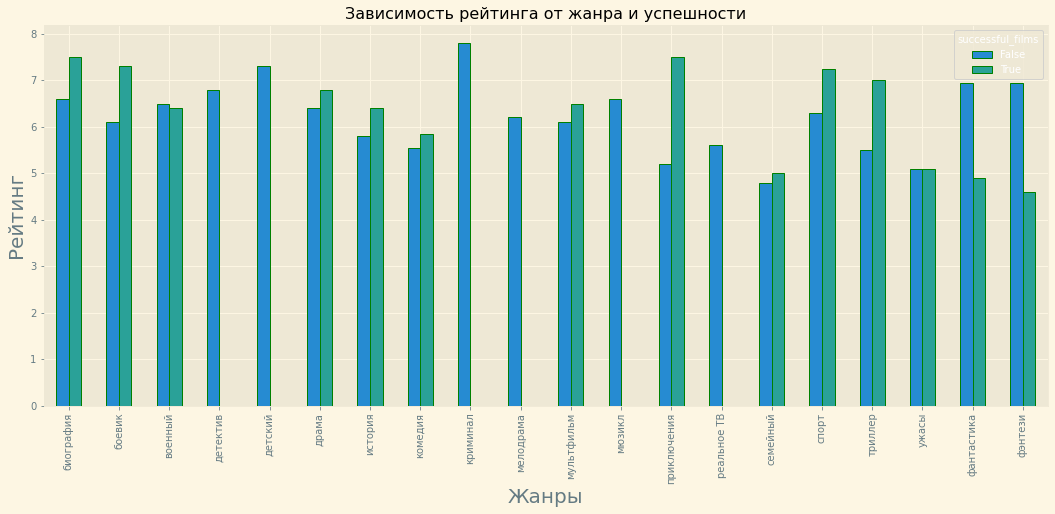

In [ ]:
#Столбец-фильтр для рейтинга
data['good_ratings'] = np.where(data['ratings'] >= 1.5, data['ratings'], np.nan)

#Создаю таблицу для анализа жанров и рейтнга по ним
genres_rating = data.pivot_table(index='main_genre', columns='successful_films', values='good_ratings', aggfunc='median')

#Результат
print(genres_rating)
genres_rating.plot(kind='bar', figsize=(18, 7), edgecolor='green');

plt.xlabel('Жанры', fontsize=20)
plt.ylabel('Рейтинг', fontsize=20)
plt.title('Зависимость рейтинга от жанра и успешности', color='black')

plt.show()

<b>Вывод:</b>

- Финансово успешным можно считать только каждый пятый фильм выпущенный с поддержкой государства, это является большой проблемой
- Из предыдущих исследований следует, что бюджет таких фильмов более чем на 45% состоит из денег гос.поддержки, из которых только 19% возвращаются обратно
- Зависимость бюджета от кассовых сборов небольшая, бывают некоторые картины "стреляют", что и создаёт 20% успеха, после порога в 800 фильмы перестают окупаться
- Рейтинг фильмов от бюджета не особо зависит, имея средние значения, он колеблится от высокого до низкого от фильма к фильму в различном бюджетном диапазоне
- Рейтинг что у провальных, что у успешных картин довольно средний, с некоторыми аномалиями или просадками по жанрам. Например успешные мультфильмы имеют всего 4,3 медианного рейтинга, в отличии от 7,3 провальных, такое могло случиться из-за походов в кинотеатры детьми в сопровождении взрослых, которые после сеансов делали кассу, но низко оценивали картины
- Странным выглядит отсутствие жанровых успехов у фильмов на военную тематику и анимационных, а с детективами наоборот

<b>Выявление трендов:</b>

 В дальнейших исследованиях определю самые кассовые и популярные параметры для кино


Самые кассовые жанры кино: main_genre
спорт          989.256000
история        363.867000
мультфильм     201.797280
приключения    200.932667
комедия        184.761000
Name: box_office, dtype: float64


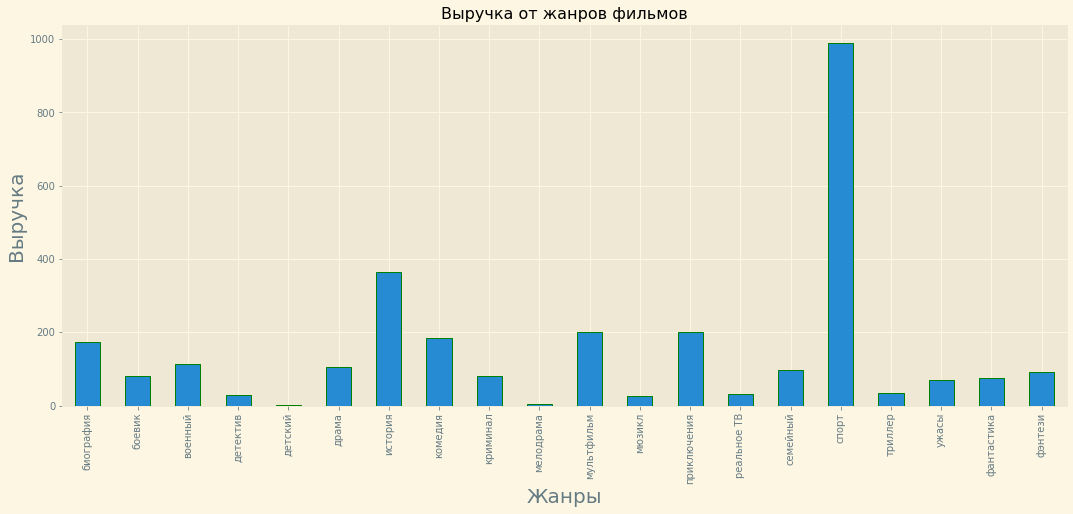

In [ ]:
#Группирую выручку по жанрам
world_genre_box = filtered_finance.groupby('main_genre')['box_office'].mean()

#Вывод жанров
print('Самые кассовые жанры кино:', world_genre_box.nlargest(5))

#Таблица для визуализации результата
world_genre_box.plot(kind='bar', figsize=(18, 7), edgecolor='green', title='Распределение рейтингов по жанровой выручке');

plt.xlabel('Жанры', fontsize=20)
plt.ylabel('Выручка', fontsize=20)
plt.title('Выручка от жанров фильмов', color='black')

plt.show();

- Спортивные фильмы являются абсолютным лидером по выручке в прокате, возможно из-за вдохновения на свершения и преодоление себя и своих барьеров, а также зачастую кульминационной воодушевляющей победы. Люди к такому тянутся

- Популярность исторических фильмов можно объяснить лишь тем, что жизнь придумывает лучшие сценарии

- Мультфильмы в топ 3 по выручке, это нормально, чем занять ребёнка, как не походом в кино (теория)

Самый кассовый рейтинг: ratings
7.5    746.443833
6.8    616.750600
7.6    492.395000
8.2    408.647000
6.5    380.614800
Name: box_office, dtype: float64


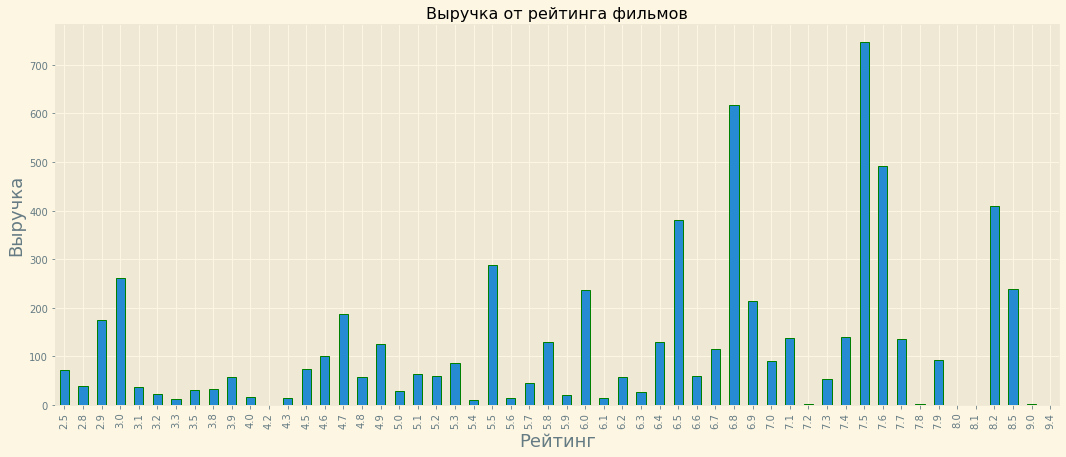

In [ ]:
#Выясню влияет ли рейтинг на выручку
world_ratings_box = filtered_finance.groupby('ratings')['box_office'].mean()

#Вывод рейтинга
print('Самый кассовый рейтинг:', world_ratings_box.nlargest(5))

#Таблица для визуализации результата
world_ratings_box.plot(kind='bar', figsize=(18, 7), edgecolor='green', title='Распределение выручки по рейтингу');

plt.xlabel('Рейтинг', fontsize=18)
plt.ylabel('Выручка', fontsize=18)
plt.title('Выручка от рейтинга фильмов', color='black')

plt.show();

- Самый кассовый рейтинг 7.5, это нормально, большинство фильмов в этом диапазоне и существуют

- Заметен постепенный рост выручки с рейтингом фильма

Самые кассовые месяцы проката: show_start_date
12    475.380645
3     196.463667
10    191.733710
2     124.289000
1     105.763000
Name: box_office, dtype: float64


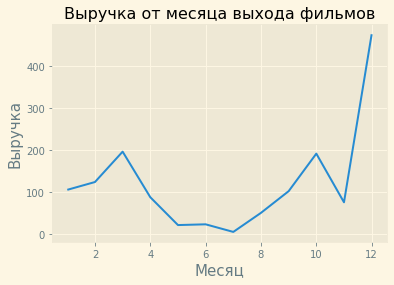

In [ ]:
#Выясню влияет ли выручка на месяц релиза
rental_season = filtered_finance.groupby(filtered_finance['show_start_date'].dt.month)['box_office'].mean()

#Вывод рейтинга
print('Самые кассовые месяцы проката:', rental_season.nlargest(5))

# построение графика зависимости между месяцем и суммой доходов
plt.plot(rental_season)

plt.xlabel('Месяц', fontsize=15)
plt.ylabel('Выручка', fontsize=15)
plt.title('Выручка от месяца выхода фильмов', color='black')

plt.show();

- Ожидаемое первое место от декабря, с его громкими премьерами и предновогодней атмосферой, так и распологающей хорошо провести досуг  
- Выручка в холодное время года растёт, а в пору тепла и активного отдыха проседает, это вполне сопастовимо с реальностью

<b>Выявление выгодных компонентов для России:</b>

In [ ]:
#Создаю столбец-фильтр
data['main_country'] = data['production_country'].apply(lambda x: x.split(',')[0])

#Переменная-фильтр
russia_data = data[data['main_country'] == "Россия"]

#Группировка режиссёров по выручке
russia_director_box = russia_data.groupby(russia_data['chief_director'])['box_office'].mean()

#Вывод рейтинга
print('Самый кассовый режиссёр:', russia_director_box.nlargest(5))

#Таблицы для визуализации не будет, данных много, создавать доп.фильтры для вывода таблицы нет смысла

Самый кассовый режиссёр: chief_director
О.Трофим        1445.7320
А.Мегердичев    1389.8465
И.Куликов       1361.1930
А.Сидоров       1135.8770
Д.Козловский     820.5280
Name: box_office, dtype: float64


In [ ]:
#Группировка студий по выручке
russia_studio_box = russia_data.groupby(russia_data['film_studio'])['box_office'].mean()

#Вывод рейтинга
print('Самая кассовая студия:', russia_studio_box.nlargest(5))

Самая кассовая студия: film_studio
ООО "МЕМ-МЕДИА" по заказу АО "ВБД Груп"                                                         3073.5690
ООО "Кинокомпания МАРС-фильм" по заказу ООО "ММЕ", ООО "Амедиа Продакшн" и АО "Телекомпания"    2271.7540
ООО "Студия "ТРИТЭ" Никиты Михалкова"                                                           2090.9705
ООО "ЛЕГИО ФЕЛИКС", ООО "Ника ТВ"                                                               1682.6800
ООО "Киностудия "Слово" по заказу ООО "Уолт Дисней Компании СНГ", АО "ВБД Груп"                 1655.0380
Name: box_office, dtype: float64


<b>Вывод по анализу фильмов с гос.поддержкой:</b>

- Изучил успешность фильмов с гос.поддержкой
-- Каждый пятый фильм окупается
-- Финансы выделенные на проект государством  практически никогда не возвращаются
-- У фильмов неплохие рейтинги, но на прибыльности они не сказываются
- Выявил тренды оказывающие наибольшее влияние на успешность картин в прокате
- Исследовал в реалиях российского проката самые кассовые студии и режиссёров

#Шаг 5. Общий вывод

- Работа проведена с данными, опубликованными на портале открытых данных Минестерства культуры
- Объединил датафреймы с информацией о фильмах и прокатных заработках
- Где это необходимо удалил или заменил дубликаты\пропуски
- Изменил тип столбцов для удобной работы и восприятия
- Устранил аномалии в данных  
- Создал новые столбцы с данными

- В ходе выполненеия прокетной работы изучил рынок российского кинопроката и выявил следующее:
-- Доля гос.поддержки в среднем состовляет почти половину от бюджета, при окупаемости таких картин в 22%, это крайне невыгодно, плюс доля невозвратных средств около 80%.
-- Увеличение бюджета не приводит к окупаемости, по имеющимся данным видно, что в сегменте бюджета ниже среднего сосредоточен весь "успех" фильмов с гос.поддержкой
-- Наиболее кассовыми являются фильмы 12 и 16+ категорий, из-за их доступности и уместности для людей любого возраста
-- Доля осведомлённости о фильмах, прокат которых идёт в кинотеатрах ежегодно увеличивается, так-же увеличиваются и доходы от проката
-- Рейтинг гос.кино чуть выше среднего, и не влияет на окупаемость фильма

- Проведя анализ закономерностей приводящих к финансовым успехам фильмов, выделил параметры для наибольшей вероятности заработка в прокате:
-- Стоит уделить внимание месяцу проката, желательно выпускить фильмы в конце года, стараясь избегать тёплых месяцев
-- Жанр фильма стоит выбирать в категориях: спортивный, исторический, приключения или мультфильм, а лучше объеденить. Мелодрамы или мюзиклы приносят меньше всего выручки в прокате
-- Возрастной рейтинг 12,16+
-- Лучший по доходности рейтинг возле крепких 7.5 из 10
-- Есть режиссёры и киностудии приносящие в среднем лучшие доходы, стоит брать их во внимаие (Чуть выше перечень)





